# Experiment 4

Perform preprocessing and modeling of the Logistic Regression classifier on the poisonous mushroom dataset from kaggle.

## Load libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Pre-processing
### Read the dataset

In [5]:
df = pd.read_csv(r'/home/volt/code/cemetery-of-culture/year-3/computational-linguistics/assets/data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Explore the dataset

In [6]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Applying a Label Encoder on our dataset

In [8]:
df = df.apply(LabelEncoder().fit_transform)

### Extract our features and label

In [9]:
X = df.drop(['class'], axis=1)
y = pd.DataFrame(df['class'])

In [10]:
X.shape

(8124, 22)

In [11]:
y.shape

(8124, 1)

### Check if dataset is balanced or unbalanced

<AxesSubplot: >

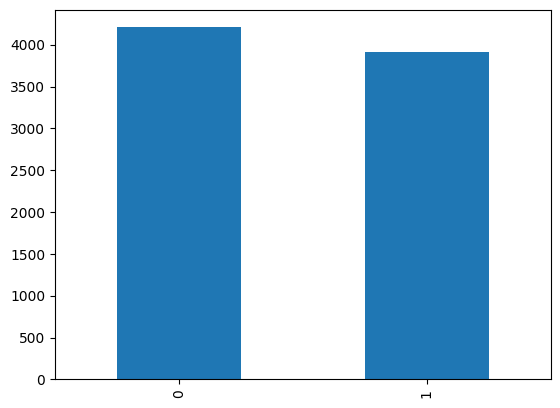

In [12]:
y['class'].value_counts().plot.bar()

In [13]:
y['class'].value_counts(normalize=True).to_frame().T

,0,1
class,0.517971,0.482029


Looking at these values and the bar graph above, it's safe to say that our dataset is balanced.

### Train, test and split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5, shuffle=True)

In [15]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6008,5,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,2
1856,5,0,9,1,0,1,1,1,10,1,...,2,7,7,0,2,1,4,3,4,0
2484,5,0,2,1,5,1,0,0,7,1,...,2,7,3,0,2,1,4,2,4,0
3699,5,2,5,0,1,1,0,1,2,0,...,2,7,7,0,2,1,4,3,4,0
302,5,2,9,1,3,1,1,1,10,1,...,2,7,7,0,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,5,3,2,1,5,1,0,0,5,1,...,2,6,6,0,2,1,4,2,4,0
1725,2,3,8,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,4,1
4079,2,0,9,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,4,1
2254,5,3,4,1,5,1,0,0,10,1,...,2,7,7,0,2,1,4,2,4,0


In [16]:
y_train

,class
6008,1
1856,0
2484,0
3699,1
302,0
...,...
3046,0
1725,1
4079,1
2254,0


## Logistic Regression

In [17]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

logisticRegressionPredicted = model.predict(X_test)

print(f'{classification_report(y_test, logisticRegressionPredicted)} \n\nAccuracy for the logistic regression classifier:  {accuracy_score(y_test, logisticRegressionPredicted) * 100} %')

/home/volt/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1232
           1       0.96      0.93      0.94      1206

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438
 

Accuracy for the logistic regression classifier:  94.46267432321575 %


/home/volt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
